In [89]:
# Importing Library -------------%%%%

!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

import pandas as pd 
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import norm
import seaborn as sns



In [90]:
# Authenticating Users ------------%%%%%%
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)


In [91]:



downloaded = drive.CreateFile({'id':'1H3Dpt2nkyFhpap7CuATl_YGi2dXJFS7z'}) # replace the id with id of file you want to access
downloaded.GetContentFile('tv.csv')

downloaded = drive.CreateFile({'id':'1sYMrQB_ViWlhUAkBA_znHSZLxDPHIQBh'}) # replace the id with id of file you want to access
downloaded.GetContentFile('temp_data.csv')

In [92]:
#imporing capitalbikeshare-tripdata dataset
temp = pd.read_csv("temp_data.csv") 
temp.head()

,LAT,LON,YEAR,MO,DY,PRECTOT,QV2M,RH2M,PS,T2M_RANGE,TS,T2MDEW,T2MWET,T2M_MAX,T2M_MIN,T2M,WS50M_RANGE,WS10M_RANGE
0,39.07271,-76.98409,2020,1,1,0.00,3.12,70.76,99.90,8.02,1.35,-2.70,-2.64,7.11,-0.91,2.02,4.67,4.39
1,39.07271,-76.98409,2020,1,2,0.01,4.09,86.33,100.20,9.68,2.23,0.97,0.77,7.90,-1.78,3.05,5.88,1.73
2,39.07271,-76.98409,2020,1,3,6.28,6.55,96.38,99.80,6.49,7.72,7.61,7.59,12.00,5.51,8.17,5.32,2.81
3,39.07271,-76.98409,2020,1,4,6.11,7.00,95.56,99.33,10.09,8.64,8.51,8.33,14.77,4.68,9.20,7.27,5.43
4,39.07271,-76.98409,2020,1,5,0.03,3.03,69.01,100.38,5.19,1.67,-3.04,-3.02,4.63,-0.56,2.01,11.63,8.55


In [93]:
#imporing capitalbikeshare-tripdata dataset
df = pd.read_csv("tv.csv") 
df.head()

,Unnamed: 0,ride_id,rideable_type,started_at,start_station_id,time_to_travel,DY,MO,YEAR
0,0,4479E04D9D45AC6B,docked_bike,2020-08-22 17:09:39,31287.0,1223.0,22.0,8.0,2020.0
1,1,EF88DFBC1E6648EC,docked_bike,2020-08-26 13:13:54,31271.0,287.0,26.0,8.0,2020.0
2,2,25812556961CFABD,docked_bike,2020-08-07 16:34:41,32014.0,2338.0,7.0,8.0,2020.0
3,3,1621384E51D38F1F,docked_bike,2020-08-07 20:32:05,31528.0,833.0,7.0,8.0,2020.0
4,4,BC10B8C7848D1FDF,docked_bike,2020-08-18 13:40:34,31122.0,513.0,18.0,8.0,2020.0


In [94]:
s1 = df.query('start_station_id == 31131')
s1 = s1.sort_values(by=['DY'])
s1 = pd.DataFrame(s1)
s1 = s1.reset_index()
s1.head()

,index,Unnamed: 0,ride_id,rideable_type,started_at,start_station_id,time_to_travel,DY,MO,YEAR
0,39247076,39247076,5353FF6B298080A3,docked_bike,2020-10-01 08:22:30,31131.0,1007.0,1.0,10.0,2020.0
1,5649483,5649483,E43D340103773E59,docked_bike,2020-08-01 21:42:15,31131.0,2295.0,1.0,8.0,2020.0
2,18526263,18526263,F1255779A5D65C31,docked_bike,2020-09-01 22:55:45,31131.0,236.0,1.0,9.0,2020.0
3,42831679,42831679,BFF20119F0FCEBB9,docked_bike,2020-10-01 07:42:00,31131.0,592.0,1.0,10.0,2020.0
4,8973844,8973844,88AEB2387543B67B,electric_bike,2020-08-01 18:36:31,31131.0,517.0,1.0,8.0,2020.0


In [95]:
result = pd.merge(s1, temp, how='left', on=['DY', 'MO','YEAR'])
result


,index,Unnamed: 0,ride_id,rideable_type,started_at,start_station_id,time_to_travel,DY,MO,YEAR,LAT,LON,PRECTOT,QV2M,RH2M,PS,T2M_RANGE,TS,T2MDEW,T2MWET,T2M_MAX,T2M_MIN,T2M,WS50M_RANGE,WS10M_RANGE
0,39247076,39247076,5353FF6B298080A3,docked_bike,2020-10-01 08:22:30,31131.0,1007.0,1.0,10.0,2020.0,39.07271,-76.98409,2.51,8.18,68.46,100.16,10.40,17.06,11.04,10.78,22.21,11.81,16.79,6.68,4.02
1,5649483,5649483,E43D340103773E59,docked_bike,2020-08-01 21:42:15,31131.0,2295.0,1.0,8.0,2020.0,39.07271,-76.98409,1.71,15.53,70.06,100.14,9.68,27.89,21.05,20.91,31.55,21.88,26.85,6.75,4.50
2,18526263,18526263,F1255779A5D65C31,docked_bike,2020-09-01 22:55:45,31131.0,236.0,1.0,9.0,2020.0,39.07271,-76.98409,2.49,14.35,85.16,100.56,7.80,22.62,19.74,19.71,26.47,18.67,22.34,2.27,1.88
3,42831679,42831679,BFF20119F0FCEBB9,docked_bike,2020-10-01 07:42:00,31131.0,592.0,1.0,10.0,2020.0,39.07271,-76.98409,2.51,8.18,68.46,100.16,10.40,17.06,11.04,10.78,22.21,11.81,16.79,6.68,4.02
4,8973844,8973844,88AEB2387543B67B,electric_bike,2020-08-01 18:36:31,31131.0,517.0,1.0,8.0,2020.0,39.07271,-76.98409,1.71,15.53,70.06,100.14,9.68,27.89,21.05,20.91,31.55,21.88,26.85,6.75,4.50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
800,43994370,43994370,3352CFAEFC8ACD69,docked_bike,2020-10-31 16:29:27,31131.0,1098.0,31.0,10.0,2020.0,39.07271,-76.98409,0.14,4.10,72.50,101.85,8.58,6.87,1.30,1.18,10.13,1.55,5.82,7.18,3.44
801,40215232,40215232,0EC08F98DCFEE551,docked_bike,2020-10-31 22:57:50,31131.0,822.0,31.0,10.0,2020.0,39.07271,-76.98409,0.14,4.10,72.50,101.85,8.58,6.87,1.30,1.18,10.13,1.55,5.82,7.18,3.44
802,7277382,7277382,AD4CA8A69A35D4B7,docked_bike,2020-08-31 10:53:13,31131.0,1545.0,31.0,8.0,2020.0,39.07271,-76.98409,7.10,12.33,80.48,100.51,5.10,20.75,17.36,17.29,23.45,18.35,20.80,2.39,1.63
803,8542878,8542878,26EDA0FBF42675CC,electric_bike,2020-08-31 05:42:19,31131.0,646.0,31.0,8.0,2020.0,39.07271,-76.98409,7.10,12.33,80.48,100.51,5.10,20.75,17.36,17.29,23.45,18.35,20.80,2.39,1.63


In [96]:
s10 = df.query('start_station_id == 31233')
s10 = s10.sort_values(by=['DY'])
s10 = pd.DataFrame(s10)
s10 = s10.reset_index()
s10.head()

,index,Unnamed: 0,ride_id,rideable_type,started_at,start_station_id,time_to_travel,DY,MO,YEAR
0,37494555,37494555,2D0664BD2C7F5422,electric_bike,2020-09-01 14:46:22,31233.0,761.0,1.0,9.0,2020.0
1,40652617,40652617,697981EAFF0D7E90,docked_bike,2020-10-01 15:32:56,31233.0,487.0,1.0,10.0,2020.0
2,22152506,22152506,CCAE8ECC7860399C,docked_bike,2020-09-01 22:07:18,31233.0,1736.0,1.0,9.0,2020.0
3,39926205,39926205,6AD712B029974936,docked_bike,2020-10-01 14:49:22,31233.0,1531.0,1.0,10.0,2020.0
4,44176417,44176417,EDAC85D8DC5DEA56,docked_bike,2020-10-01 17:53:20,31233.0,1079.0,1.0,10.0,2020.0


In [97]:
s6 =s1.groupby(["rideable_type","DY"])
s6

In [98]:
sa =result.groupby(["DY","MO","PS","T2M_RANGE","T2M_MAX","T2M_MIN","RH2M","rideable_type","WS50M_RANGE","T2MDEW","T2M","QV2M"]).size()
s5 = []
s6 = []
sa = pd.DataFrame(sa,columns=['count'])
modified = sa.reset_index()
a = 0
for i in range(len(modified)):
  if(modified['rideable_type'][i] == 'docked_bike'):
    s5.append(modified['count'][i])
    s6.append(a)
  else:
    s6.append(modified['count'][i])
    s5.append(a)
print(s6)
print(s5)
sb = s1[['DY','MO','time_to_travel']]
modified['docked_b'] = s5
modified['electric_b'] = s6
#modified = pd.merge(modified, sb, how="left", on=["DY", "MO"])
#sb
modified

[0, 5, 0, 4, 0, 0, 6, 0, 3, 0, 0, 7, 0, 2, 0, 0, 5, 0, 3, 0, 0, 4, 0, 8, 0, 0, 1, 0, 11, 0, 0, 10, 0, 7, 0, 0, 24, 0, 7, 0, 0, 5, 12, 0, 0, 9, 0, 5, 0, 0, 6, 0, 3, 0, 0, 10, 0, 4, 0, 0, 6, 0, 9, 0, 0, 8, 0, 2, 0, 0, 11, 0, 8, 0, 0, 4, 0, 9, 0, 0, 6, 0, 6, 0, 0, 6, 0, 4, 0, 0, 1, 0, 7, 0, 0, 5, 0, 18, 0, 3, 0, 5, 0, 0, 4, 0, 10, 0, 0, 2, 0, 11, 0, 0, 6, 0, 2, 0, 0, 7, 0, 4, 0, 5, 0, 7, 0, 0, 3, 0, 4, 0, 0, 6, 0, 5, 0, 0, 5, 0, 5, 0, 0, 6, 0, 8, 0, 0, 3, 0]
[7, 0, 6, 0, 6, 5, 0, 5, 0, 3, 3, 0, 5, 0, 8, 2, 0, 4, 0, 2, 8, 0, 9, 0, 3, 3, 0, 6, 0, 11, 3, 0, 7, 0, 7, 6, 0, 5, 0, 6, 2, 0, 0, 5, 3, 0, 1, 0, 6, 7, 0, 7, 0, 3, 6, 0, 7, 0, 5, 4, 0, 11, 0, 3, 7, 0, 8, 0, 5, 4, 0, 4, 0, 5, 3, 0, 3, 0, 5, 1, 0, 1, 0, 8, 4, 0, 6, 0, 5, 6, 0, 11, 0, 3, 1, 0, 8, 0, 2, 0, 3, 0, 1, 9, 0, 6, 0, 5, 5, 0, 3, 0, 6, 3, 0, 4, 0, 6, 1, 0, 4, 0, 4, 0, 6, 0, 3, 4, 0, 9, 0, 3, 2, 0, 1, 0, 5, 2, 0, 3, 0, 2, 8, 0, 7, 0, 5, 1, 0, 2]


,DY,MO,PS,T2M_RANGE,T2M_MAX,T2M_MIN,RH2M,rideable_type,WS50M_RANGE,T2MDEW,T2M,QV2M,count,docked_b,electric_b
0,1.0,8.0,100.14,9.68,31.55,21.88,70.06,docked_bike,6.75,21.05,26.85,15.53,7,7,0
1,1.0,8.0,100.14,9.68,31.55,21.88,70.06,electric_bike,6.75,21.05,26.85,15.53,5,0,5
2,1.0,9.0,100.56,7.80,26.47,18.67,85.16,docked_bike,2.27,19.74,22.34,14.35,6,6,0
3,1.0,9.0,100.56,7.80,26.47,18.67,85.16,electric_bike,2.27,19.74,22.34,14.35,4,0,4
4,1.0,10.0,100.16,10.40,22.21,11.81,68.46,docked_bike,6.68,11.04,16.79,8.18,6,6,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145,30.0,9.0,99.73,9.32,21.10,11.78,72.31,electric_bike,3.46,11.06,15.97,8.23,8,0,8
146,30.0,10.0,100.21,5.72,11.62,5.90,83.46,docked_bike,4.29,5.96,8.61,5.82,5,5,0
147,31.0,8.0,100.51,5.10,23.45,18.35,80.48,docked_bike,2.39,17.36,20.80,12.33,1,1,0
148,31.0,8.0,100.51,5.10,23.45,18.35,80.48,electric_bike,2.39,17.36,20.80,12.33,3,0,3


In [99]:
 modified.reset_index(inplace=True, drop=True)
modified.sort_values(['DY', 'MO'], ascending=[True, False])


,DY,MO,PS,T2M_RANGE,T2M_MAX,T2M_MIN,RH2M,rideable_type,WS50M_RANGE,T2MDEW,T2M,QV2M,count,docked_b,electric_b
4,1.0,10.0,100.16,10.40,22.21,11.81,68.46,docked_bike,6.68,11.04,16.79,8.18,6,6,0
2,1.0,9.0,100.56,7.80,26.47,18.67,85.16,docked_bike,2.27,19.74,22.34,14.35,6,6,0
3,1.0,9.0,100.56,7.80,26.47,18.67,85.16,electric_bike,2.27,19.74,22.34,14.35,4,0,4
0,1.0,8.0,100.14,9.68,31.55,21.88,70.06,docked_bike,6.75,21.05,26.85,15.53,7,7,0
1,1.0,8.0,100.14,9.68,31.55,21.88,70.06,electric_bike,6.75,21.05,26.85,15.53,5,0,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
142,30.0,8.0,99.79,10.16,27.15,17.00,61.54,docked_bike,7.52,14.97,22.62,10.61,8,8,0
143,30.0,8.0,99.79,10.16,27.15,17.00,61.54,electric_bike,7.52,14.97,22.62,10.61,6,0,6
149,31.0,10.0,101.85,8.58,10.13,1.55,72.50,docked_bike,7.18,1.30,5.82,4.10,2,2,0
147,31.0,8.0,100.51,5.10,23.45,18.35,80.48,docked_bike,2.39,17.36,20.80,12.33,1,1,0


In [100]:
df1 = modified[modified['rideable_type'] == 'docked_bike']
df1 = df1.drop(['rideable_type','count', 'electric_b'], axis=1)
df1

,DY,MO,PS,T2M_RANGE,T2M_MAX,T2M_MIN,RH2M,WS50M_RANGE,T2MDEW,T2M,QV2M,docked_b
0,1.0,8.0,100.14,9.68,31.55,21.88,70.06,6.75,21.05,26.85,15.53,7
2,1.0,9.0,100.56,7.80,26.47,18.67,85.16,2.27,19.74,22.34,14.35,6
4,1.0,10.0,100.16,10.40,22.21,11.81,68.46,6.68,11.04,16.79,8.18,6
5,2.0,8.0,100.03,10.09,34.01,23.92,66.16,4.90,21.85,28.65,16.31,5
7,2.0,9.0,100.01,8.21,29.40,21.18,87.59,1.60,23.00,25.20,17.66,5
...,...,...,...,...,...,...,...,...,...,...,...,...
142,30.0,8.0,99.79,10.16,27.15,17.00,61.54,7.52,14.97,22.62,10.61,8
144,30.0,9.0,99.73,9.32,21.10,11.78,72.31,3.46,11.06,15.97,8.23,7
146,30.0,10.0,100.21,5.72,11.62,5.90,83.46,4.29,5.96,8.61,5.82,5
147,31.0,8.0,100.51,5.10,23.45,18.35,80.48,2.39,17.36,20.80,12.33,1


In [101]:
df2 = modified[modified['rideable_type'] == 'electric_bike']
df2 = df2.drop(['rideable_type','count', 'docked_b'], axis=1)
df2

,DY,MO,PS,T2M_RANGE,T2M_MAX,T2M_MIN,RH2M,WS50M_RANGE,T2MDEW,T2M,QV2M,electric_b
1,1.0,8.0,100.14,9.68,31.55,21.88,70.06,6.75,21.05,26.85,15.53,5
3,1.0,9.0,100.56,7.80,26.47,18.67,85.16,2.27,19.74,22.34,14.35,4
6,2.0,8.0,100.03,10.09,34.01,23.92,66.16,4.90,21.85,28.65,16.31,6
8,2.0,9.0,100.01,8.21,29.40,21.18,87.59,1.60,23.00,25.20,17.66,3
11,3.0,8.0,100.50,9.03,31.14,22.11,68.29,4.94,19.64,25.80,14.17,7
...,...,...,...,...,...,...,...,...,...,...,...,...
138,29.0,8.0,99.16,7.51,28.85,21.34,83.94,5.55,22.34,25.22,17.08,5
140,29.0,9.0,99.67,11.55,26.35,14.80,88.15,6.01,18.92,20.96,13.77,5
143,30.0,8.0,99.79,10.16,27.15,17.00,61.54,7.52,14.97,22.62,10.61,6
145,30.0,9.0,99.73,9.32,21.10,11.78,72.31,3.46,11.06,15.97,8.23,8


In [102]:
df1['PS'] = df1['PS'] - 100
modified = df1
modified

,DY,MO,PS,T2M_RANGE,T2M_MAX,T2M_MIN,RH2M,WS50M_RANGE,T2MDEW,T2M,QV2M,docked_b
0,1.0,8.0,0.14,9.68,31.55,21.88,70.06,6.75,21.05,26.85,15.53,7
2,1.0,9.0,0.56,7.80,26.47,18.67,85.16,2.27,19.74,22.34,14.35,6
4,1.0,10.0,0.16,10.40,22.21,11.81,68.46,6.68,11.04,16.79,8.18,6
5,2.0,8.0,0.03,10.09,34.01,23.92,66.16,4.90,21.85,28.65,16.31,5
7,2.0,9.0,0.01,8.21,29.40,21.18,87.59,1.60,23.00,25.20,17.66,5
...,...,...,...,...,...,...,...,...,...,...,...,...
142,30.0,8.0,-0.21,10.16,27.15,17.00,61.54,7.52,14.97,22.62,10.61,8
144,30.0,9.0,-0.27,9.32,21.10,11.78,72.31,3.46,11.06,15.97,8.23,7
146,30.0,10.0,0.21,5.72,11.62,5.90,83.46,4.29,5.96,8.61,5.82,5
147,31.0,8.0,0.51,5.10,23.45,18.35,80.48,2.39,17.36,20.80,12.33,1


In [103]:
modified.corr()

,DY,MO,PS,T2M_RANGE,T2M_MAX,T2M_MIN,RH2M,WS50M_RANGE,T2MDEW,T2M,QV2M,docked_b
DY,1.000000,-0.020701,-0.103862,-0.022936,-0.222472,-0.183190,0.196525,-0.114184,-0.109702,-0.215147,-0.118516,-0.208536
MO,-0.020701,1.000000,0.329416,0.287184,-0.766831,-0.801369,0.038574,0.090055,-0.677416,-0.814233,-0.710756,0.115408
PS,-0.103862,0.329416,1.000000,0.204841,-0.472013,-0.506195,-0.320133,-0.038013,-0.551187,-0.503600,-0.517231,0.152145
T2M_RANGE,-0.022936,0.287184,0.204841,1.000000,-0.031804,-0.491570,-0.609422,0.087059,-0.471238,-0.277714,-0.482162,0.246168
T2M_MAX,-0.222472,-0.766831,-0.472013,-0.031804,1.000000,0.886031,0.055945,-0.155574,0.842098,0.966262,0.842680,-0.048893
T2M_MIN,-0.183190,-0.801369,-0.506195,-0.491570,0.886031,1.000000,0.331405,-0.175866,0.952286,0.970713,0.957845,-0.156732
RH2M,0.196525,0.038574,-0.320133,-0.609422,0.055945,0.331405,1.000000,-0.214730,0.552849,0.199174,0.511704,-0.340242
WS50M_RANGE,-0.114184,0.090055,-0.038013,0.087059,-0.155574,-0.175866,-0.214730,1.000000,-0.228428,-0.170072,-0.222761,0.005528
T2MDEW,-0.109702,-0.677416,-0.551187,-0.471238,0.842098,0.952286,0.552849,-0.228428,1.000000,0.926225,0.986773,-0.215206
T2M,-0.215147,-0.814233,-0.503600,-0.277714,0.966262,0.970713,0.199174,-0.170072,0.926225,1.000000,0.929435,-0.100458


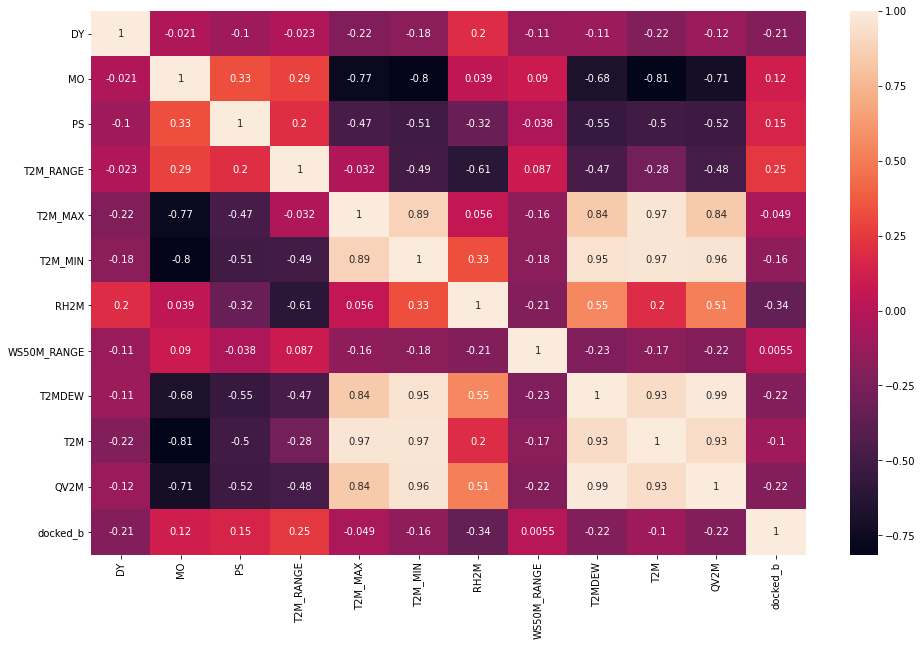

In [104]:
plt.figure(figsize=(16,10))
sns.heatmap(modified.corr(), annot=True)
plt.show()

In [105]:
docked_count = modified['docked_b'].sum()
print (docked_count)
electric_count = df2['electric_b'].sum()
print (electric_count)


423
382


In [106]:
index = modified.index
number_of_rows = len(index)
number_of_rows

89

In [107]:
from sklearn.svm import SVC
!pip3 install quandl
!pip3 install sklearn
import quandl, math
from sklearn.model_selection import cross_validate
from sklearn.model_selection import train_test_split
from sklearn import preprocessing, svm
from sklearn.linear_model import LinearRegression

In [108]:

X = modified.drop(['docked_b'], 1)
y = modified['docked_b']

In [109]:
X = np.array(X)
y = np.array(y)

In [110]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [111]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [112]:
from sklearn.ensemble import RandomForestRegressor

regressor = RandomForestRegressor(n_estimators=10, random_state=20)
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)

In [113]:
from sklearn import metrics

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 2.25
Mean Squared Error: 8.175
Root Mean Squared Error: 2.8591956910991594


In [114]:
#X = preprocessing.scale(X)

In [115]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=20)

In [116]:
clf = LinearRegression()

In [117]:
clf.fit(X_train, y_train)
y_pred=clf.predict(X_test)
y_pred = np.ceil(y_pred)
y_pred

array([6., 7., 6., 4., 4., 3., 5., 7., 3., 6., 5., 4., 5., 6., 5., 4., 4.,
       5.])

In [118]:
y_test

array([5, 6, 8, 7, 5, 3, 3, 6, 2, 3, 1, 3, 5, 7, 3, 4, 4, 5])

In [119]:
#To retrieve the intercept:
print(clf.intercept_)

#For retrieving the slope:
print(clf.coef_)

-8.011911115633712
[-0.01949416  1.19237061  0.53501696  0.10491599 -0.27882076 -0.08531615
 -0.01882522 -0.07676622 -0.13622431  0.79951085 -0.22655872]


In [120]:
from sklearn.metrics import mean_squared_log_error
msleDT=mean_squared_log_error(y_pred,y_test)
rmsleLR=np.sqrt(msleDT)
print('RMLSE for the data:',rmsleLR)

RMLSE for the data: 0.3633206841824755


In [121]:
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_squared_log_error
ls = []
mse_list=[]
num_test = (number_of_rows*20)//100
for i in range(0,number_of_rows):
  u = (i)%number_of_rows
  v = (num_test+i)%number_of_rows
  if v >= num_test:
    x = modified[u:v]
    y = modified[v:]
    z = modified[:u]
    y = y.append(z)
  else:
    x = modified[v:u]
    y = modified[u:]
    z = modified[:v]
    y = y.append(z)
  y = pd.DataFrame(y)
  x = pd.DataFrame(x)
  X_train = np.array(x.drop(['docked_b'], 1))
  y_train = np.array(x['docked_b'])
  X_test = np.array(y.drop(['docked_b'], 1))
  y_test = np.array(y['docked_b'])
  sc = StandardScaler()
  X_train = sc.fit_transform(X_train)
  X_test = sc.transform(X_test)
  regressor = LinearRegression()
  regressor.fit(X_train, y_train)
  y_pred = regressor.predict(X_test)
  mse_reg = mean_squared_error(y_test, y_pred)
  rmsleRF=np.sqrt(mse_reg)
  ls.append(rmsleRF)
  mse_list.append(mse_reg)
LinearRegression_max_e = np.max(ls)
LinearRegression_e = np.mean(ls)
mean_mse_LinearRegression_e = np.mean(mse_reg)
LinearRegression_max_e

20.18578209098203

In [122]:
from sklearn.tree import DecisionTreeRegressor
#DecisionTreeRegressor class has many parameters. Input only #random_state=0 or 42.
regressor = DecisionTreeRegressor(random_state=0)
#Fit the regressor object to the dataset.
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)
confidence = regressor.score(X_test, y_test)

In [123]:
from sklearn.metrics import mean_squared_log_error
msleDT=mean_squared_log_error(y_pred,y_test)
rmsleDT=np.sqrt(msleDT)
print('RMLSE for the data:',rmsleDT)

RMLSE for the data: 0.6912271821367183


In [124]:
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
ls = []
mse_list=[]
num_test = (number_of_rows*20)//100
for i in range(0,number_of_rows):
  u = (i)%number_of_rows
  v = (num_test+i)%number_of_rows
  if v >= num_test:
    x = modified[u:v]
    y = modified[v:]
    z = modified[:u]
    y = y.append(z)
  else:
    x = modified[v:u]
    y = modified[u:]
    z = modified[:v]
    y = y.append(z)
  y = pd.DataFrame(y)
  x = pd.DataFrame(x)
  X_train = np.array(x.drop(['docked_b'], 1))
  y_train = np.array(x['docked_b'])
  X_test = np.array(y.drop(['docked_b'], 1))
  y_test = np.array(y['docked_b'])
  sc = StandardScaler()
  X_train = sc.fit_transform(X_train)
  X_test = sc.transform(X_test)
  regressor = DecisionTreeRegressor(random_state=0)
  regressor.fit(X_train, y_train)
  y_pred = regressor.predict(X_test)
  mse_reg = mean_squared_error(y_test, y_pred)
  msleDT=mean_squared_log_error(y_pred,y_test)
  rmsleRF=np.sqrt(msleDT)
  ls.append(rmsleRF)
  mse_list.append(mse_reg)
Decision_tree_max_e = np.max(ls)
Decision_tree_e = np.mean(ls)
mean_mse_Decision_tree_e = np.mean(mse_reg)
Decision_tree_max_e

0.8257395874766414

In [125]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
#X_train = sc.fit_transform(X_train)
#X_test = sc.transform(X_test)
from sklearn.ensemble import RandomForestRegressor

regressor = RandomForestRegressor(n_estimators=20, random_state=0)
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)
confidence = regressor.score(X_test, y_test)
print(confidence)

-0.2073371104815864


In [126]:
from sklearn.metrics import mean_squared_log_error
msle=mean_squared_log_error(y_pred,y_test)
rmsleRF=np.sqrt(msle)
print('RMLSE for the data:',rmsleRF)

RMLSE for the data: 0.4599176960921846


In [127]:
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
ls = []
mse_list=[]
num_test = (number_of_rows*20)//100
for i in range(0,number_of_rows):
  u = (i)%number_of_rows
  v = (num_test+i)%number_of_rows
  if v >= num_test:
    x = modified[u:v]
    y = modified[v:]
    z = modified[:u]
    y = y.append(z)
  else:
    x = modified[v:u]
    y = modified[u:]
    z = modified[:v]
    y = y.append(z)
  y = pd.DataFrame(y)
  x = pd.DataFrame(x)
  X_train = np.array(x.drop(['docked_b'], 1))
  y_train = np.array(x['docked_b'])
  X_test = np.array(y.drop(['docked_b'], 1))
  y_test = np.array(y['docked_b'])
  sc = StandardScaler()
  X_train = sc.fit_transform(X_train)
  X_test = sc.transform(X_test)
  regressor = RandomForestRegressor(n_estimators=10, random_state=20)
  regressor.fit(X_train, y_train)
  y_pred = regressor.predict(X_test)
  mse_reg = mean_squared_error(y_test, y_pred)
  msleDT=mean_squared_log_error(y_pred,y_test)
  rmsleRF=np.sqrt(msleDT)
  ls.append(rmsleRF)
  mse_list.append(mse_reg)
Random_forest_max_e = np.max(ls)
Random_regression_e = np.mean(ls)
mean_mse_forest_e = np.mean(mse_reg)
Random_forest_max_e

0.6443274276425437

In [128]:
# Load libraries
from sklearn.ensemble import AdaBoostRegressor
# Import train_test_split function
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_regression
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
X = modified.drop(['docked_b'], 1)
y = modified['docked_b']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
X, y = make_regression(n_features=4, n_informative=2, random_state=0, shuffle=False)
abc = AdaBoostRegressor(random_state=0, n_estimators=100)
# Train Adaboost Classifer
model = abc.fit(X_train, y_train)
y_pred = abc.predict(X_test)
confidence = abc.score(X_test, y_test)

In [129]:
from sklearn.metrics import mean_squared_log_error
msle=mean_squared_log_error(y_pred,y_test)
rmsleADB=np.sqrt(msle)
print('RMLSE for the data:',rmsleADB)

RMLSE for the data: 0.5288182813505202


In [130]:
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
ls = []
mse_list=[]
num_test = (number_of_rows*20)//100
for i in range(0,number_of_rows):
  u = (i)%number_of_rows
  v = (num_test+i)%number_of_rows
  if v >= num_test:
    x = modified[u:v]
    y = modified[v:]
    z = modified[:u]
    y = y.append(z)
  else:
    x = modified[v:u]
    y = modified[u:]
    z = modified[:v]
    y = y.append(z)
  y = pd.DataFrame(y)
  x = pd.DataFrame(x)
  X_train = np.array(x.drop(['docked_b'], 1))
  y_train = np.array(x['docked_b'])
  X_test = np.array(y.drop(['docked_b'], 1))
  y_test = np.array(y['docked_b'])
  sc = StandardScaler()
  X_train = sc.fit_transform(X_train)
  X_test = sc.transform(X_test)
  regressor = AdaBoostRegressor(random_state=0, n_estimators=100)
  regressor.fit(X_train, y_train)
  y_pred = regressor.predict(X_test)
  mse_reg = mean_squared_error(y_test, y_pred)
  msleDT=mean_squared_log_error(y_pred,y_test)
  rmsleRF=np.sqrt(msleDT)
  ls.append(rmsleRF)
  mse_list.append(mse_reg)
AdaBoostClassifier_max_e = np.max(ls)
AdaBoostClassifier_e = np.mean(ls)
mean_mse_AdaBoostClassifier_e = np.mean(mse_reg)
AdaBoostClassifier_max_e

0.6625452268688119

-------------------Electric Bike--------------------

In [131]:
modified = df2

In [132]:
X = modified.drop(['electric_b'], 1)
y = modified['electric_b']

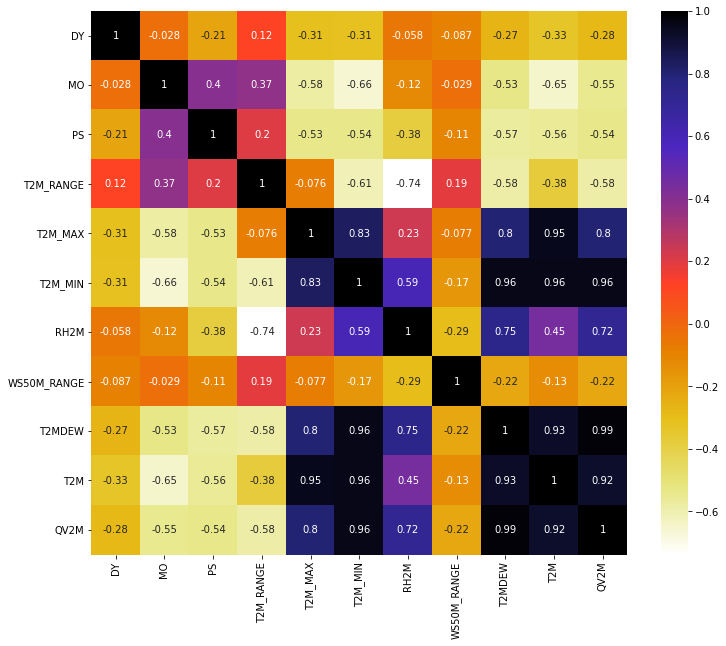

In [133]:
import seaborn as sns
#Using Pearson Correlation
plt.figure(figsize=(12,10))
cor = X.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.CMRmap_r)
plt.show()

In [134]:
# with the following function we can select highly correlated features
# it will remove the first feature that is correlated with anything other feature

def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr

In [135]:
#corr_features = correlation(X, 0.7)
#len(set(corr_features))

In [136]:
#X.drop(corr_features,axis=1)

In [137]:
#corr_features

In [138]:
X = preprocessing.scale(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
clf = LinearRegression()

In [139]:
clf.fit(X_train, y_train)
confidence = clf.score(X_test, y_test)
print(confidence)


0.2047877033281822


In [140]:
U=clf.predict(X_test)
U

array([ 6.36424435,  5.05828052, 10.01250632,  7.91143065,  6.85660386,
        7.14165117,  6.4818758 ,  6.84037327,  5.3144093 ,  3.44320619,
        4.65709864,  7.30037182,  6.21596003])

In [141]:
y_test

99      3
70     11
97     18
109     2
28     11
62      9
85      6
38      7
82      6
67      2
72      8
6       6
47      5
Name: electric_b, dtype: int64

In [142]:
clf.score(X_test,y_test)

0.2047877033281822

In [143]:
from sklearn.model_selection import KFold # import KFold
#X = np.array([[1, 2], [3, 4], [1, 2], [3, 4]]) # create an array
#y = np.array([1, 2, 3, 4]) # Create another array
#X = modified.drop(['PS','electric_b','count'], 1)
#y = modified['electric_b']
kf = KFold(n_splits=5) # Define the split - into 2 folds 
kf.get_n_splits(X) # returns the number of splitting iterations in the cross-validator
print(kf) 
KFold(n_splits=5, random_state=None, shuffle=False)

KFold(n_splits=5, random_state=None, shuffle=False)


KFold(n_splits=5, random_state=None, shuffle=False)

In [144]:
# Necessary imports: 
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn import metrics

In [145]:
# Perform 6-fold cross validation
cv_4_results = cross_val_score(clf, X, y, cv=25,)
cv_4_results = abs(cv_4_results)
print ('Cross-validated scores:', abs(cv_4_results))
#print('mean score', mean(cv_4_results))


Cross-validated scores: [7.21883994e+00 1.08701609e+00 3.25880948e+00 2.00071255e-01
 9.70597154e-01 2.48901750e-01 3.25949779e-01 3.65065942e-01
 1.37459466e+00 9.07787234e-02 6.86657908e-01 0.00000000e+00
 1.16357650e+01 9.73789435e+00 3.67059411e-01 1.13828518e+02
 1.67963808e-01 7.33259832e-01 2.14521861e-01 1.49319878e+01
 1.21740233e-01 1.95884745e-01 0.00000000e+00 1.03777611e+02
 1.70435755e+00]


In [146]:
import pandas
from sklearn.model_selection import KFold
from sklearn.preprocessing import MinMaxScaler
from sklearn.svm import SVR
import numpy as np

In [147]:

X = modified.drop(['electric_b'], 1)
y = modified['electric_b']

In [148]:
index = modified.index
number_of_rows = len(index)
number_of_rows

61

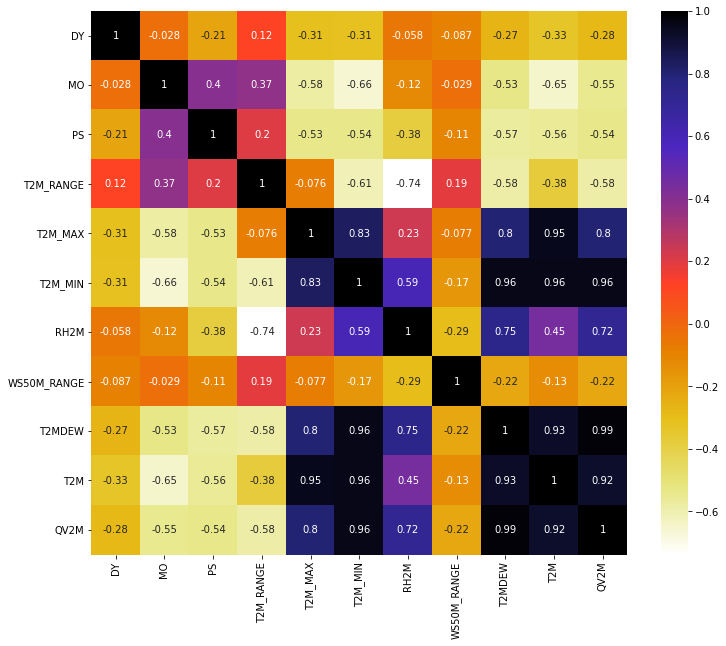

In [149]:
import seaborn as sns
#Using Pearson Correlation
plt.figure(figsize=(12,10))
cor = X.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.CMRmap_r)
plt.show()

In [150]:

X = np.array(X)
y = np.array(y)

In [151]:
X = preprocessing.scale(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
clf = LinearRegression()

In [152]:
clf.fit(X_train, y_train)
confidence = clf.score(X_test, y_test)

In [153]:
y_pred = clf.predict(X_test)

In [154]:
from sklearn.metrics import mean_squared_log_error
msle=mean_squared_log_error(y_pred,y_test)
rmsleLR1=np.sqrt(msle)
print('RMLSE for the data:',rmsleLR1)

RMLSE for the data: 0.4303516585958453


In [155]:
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_squared_log_error
ls = []
mse_list=[]
num_test = (number_of_rows*20)//100
for i in range(0,number_of_rows):
  u = (i)%number_of_rows
  v = (num_test+i)%number_of_rows
  if v >= num_test:
    x = modified[u:v]
    y = modified[v:]
    z = modified[:u]
    y = y.append(z)
  else:
    x = modified[v:u]
    y = modified[u:]
    z = modified[:v]
    y = y.append(z)
  y = pd.DataFrame(y)
  x = pd.DataFrame(x)
  X_train = np.array(x.drop(['electric_b'], 1))
  y_train = np.array(x['electric_b'])
  X_test = np.array(y.drop(['electric_b'], 1))
  y_test = np.array(y['electric_b'])
  sc = StandardScaler()
  X_train = sc.fit_transform(X_train)
  X_test = sc.transform(X_test)
  regressor = LinearRegression()
  regressor.fit(X_train, y_train)
  y_pred = regressor.predict(X_test)
  mse_reg = mean_squared_error(y_test, y_pred)
  rmsleRF=np.sqrt(mse_reg)
  ls.append(rmsleRF)
  mse_list.append(mse_reg)
LinearRegression_max_e1 = np.max(ls)
LinearRegression_e1 = np.mean(ls)
mean_mse_LinearRegression_e1 = np.mean(mse_reg)
LinearRegression_max_e1

7439.74965361398

In [156]:
from sklearn.tree import DecisionTreeRegressor
#DecisionTreeRegressor class has many parameters. Input only #random_state=0 or 42.
regressor = DecisionTreeRegressor(random_state=0)
#Fit the regressor object to the dataset.
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)
confidence = regressor.score(X_test, y_test)
print(confidence)

-59.972972972972975


In [157]:
from sklearn.metrics import mean_squared_log_error
msle=mean_squared_log_error(y_pred,y_test)
rmsleDT1=np.sqrt(msle)
print('RMLSE for the data:',rmsleDT1)

RMLSE for the data: 1.3354337868384494


In [158]:
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
ls = []
mse_list=[]
num_test = (number_of_rows*20)//100
for i in range(0,number_of_rows):
  u = (i)%number_of_rows
  v = (num_test+i)%number_of_rows
  if v >= num_test:
    x = modified[u:v]
    y = modified[v:]
    z = modified[:u]
    y = y.append(z)
  else:
    x = modified[v:u]
    y = modified[u:]
    z = modified[:v]
    y = y.append(z)
  y = pd.DataFrame(y)
  x = pd.DataFrame(x)
  X_train = np.array(x.drop(['electric_b'], 1))
  y_train = np.array(x['electric_b'])
  X_test = np.array(y.drop(['electric_b'], 1))
  y_test = np.array(y['electric_b'])
  sc = StandardScaler()
  X_train = sc.fit_transform(X_train)
  X_test = sc.transform(X_test)
  regressor = DecisionTreeRegressor(random_state=0)
  regressor.fit(X_train, y_train)
  y_pred = regressor.predict(X_test)
  mse_reg = mean_squared_error(y_test, y_pred)
  msleDT=mean_squared_log_error(y_pred,y_test)
  rmsleRF=np.sqrt(msleDT)
  ls.append(rmsleRF)
  mse_list.append(mse_reg)
Decision_tree_max_e1 = np.max(ls)
Decision_tree_e1 = np.mean(ls)
mean_mse_Decision_tree_e1 = np.mean(mse_reg)
Decision_tree_max_e1

1.3821792905780206

In [159]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
#X_train = sc.fit_transform(X_train)
#X_test = sc.transform(X_test)
from sklearn.ensemble import RandomForestRegressor

regressor = RandomForestRegressor(n_estimators=20, random_state=0)
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)


In [160]:
from sklearn.metrics import mean_squared_log_error
msle=mean_squared_log_error(y_pred,y_test)
rmsleRF1=np.sqrt(msle)
print('RMLSE for the data:',rmsleRF1)

RMLSE for the data: 1.042391214379238


In [161]:
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
ls = []
mse_list=[]
num_test = (number_of_rows*20)//100
for i in range(0,number_of_rows):
  u = (i)%number_of_rows
  v = (num_test+i)%number_of_rows
  if v >= num_test:
    x = modified[u:v]
    y = modified[v:]
    z = modified[:u]
    y = y.append(z)
  else:
    x = modified[v:u]
    y = modified[u:]
    z = modified[:v]
    y = y.append(z)
  y = pd.DataFrame(y)
  x = pd.DataFrame(x)
  X_train = np.array(x.drop(['electric_b'], 1))
  y_train = np.array(x['electric_b'])
  X_test = np.array(y.drop(['electric_b'], 1))
  y_test = np.array(y['electric_b'])
  sc = StandardScaler()
  X_train = sc.fit_transform(X_train)
  X_test = sc.transform(X_test)
  regressor = RandomForestRegressor(n_estimators=10, random_state=20)
  regressor.fit(X_train, y_train)
  y_pred = regressor.predict(X_test)
  mse_reg = mean_squared_error(y_test, y_pred)
  msleDT=mean_squared_log_error(y_pred,y_test)
  rmsleRF=np.sqrt(msleDT)
  ls.append(rmsleRF)
  mse_list.append(mse_reg)
Random_forest_max_e1 = np.max(ls)
Random_regression_e1 = np.mean(ls)
mean_mse_forest_e1 = np.mean(mse_reg)
Random_forest_max_e1

1.179594471466341

In [162]:
# Load libraries
from sklearn.ensemble import AdaBoostRegressor
# Import train_test_split function
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_regression
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
X = modified.drop(['electric_b'], 1)
y = modified['electric_b']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
X, y = make_regression(n_features=4, n_informative=2, random_state=0, shuffle=False)
abc = AdaBoostRegressor(random_state=0, n_estimators=100)
# Train Adaboost Classifer
model = abc.fit(X_train, y_train)
y_pred = abc.predict(X_test)
confidence = abc.score(X_test, y_test)

In [163]:
from sklearn.metrics import mean_squared_log_error
msle=mean_squared_log_error(y_pred,y_test)
rmsleADB1=np.sqrt(msle)
print('RMLSE for the data:',rmsleADB1)

RMLSE for the data: 0.6053890641827487


In [164]:
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
ls = []
mse_list=[]
num_test = (number_of_rows*20)//100
for i in range(0,number_of_rows):
  u = (i)%number_of_rows
  v = (num_test+i)%number_of_rows
  if v >= num_test:
    x = modified[u:v]
    y = modified[v:]
    z = modified[:u]
    y = y.append(z)
  else:
    x = modified[v:u]
    y = modified[u:]
    z = modified[:v]
    y = y.append(z)
  y = pd.DataFrame(y)
  x = pd.DataFrame(x)
  X_train = np.array(x.drop(['electric_b'], 1))
  y_train = np.array(x['electric_b'])
  X_test = np.array(y.drop(['electric_b'], 1))
  y_test = np.array(y['electric_b'])
  sc = StandardScaler()
  X_train = sc.fit_transform(X_train)
  X_test = sc.transform(X_test)
  regressor = AdaBoostRegressor(random_state=0, n_estimators=100)
  regressor.fit(X_train, y_train)
  y_pred = regressor.predict(X_test)
  mse_reg = mean_squared_error(y_test, y_pred)
  msleDT=mean_squared_log_error(y_pred,y_test)
  rmsleRF=np.sqrt(msleDT)
  ls.append(rmsleRF)
  mse_list.append(mse_reg)
AdaBoostClassifier_max_e1 = np.max(ls)
AdaBoostClassifier_e1 = np.mean(ls)
mean_mse_AdaBoostClassifier_e1 = np.mean(mse_reg)
AdaBoostClassifier_max_e1

1.37002933751838

In [165]:
import pandas as pd

cars = {'type': ['Linear Regression', 'Decision Tree','Random Forest','ADA Boost'],
        'RMSLE(Docked Bike)': [rmsleLR,rmsleDT,rmsleRF,rmsleADB],
        'RMSLE(Electric Bike]' : [rmsleLR1,rmsleDT1,rmsleRF1,rmsleADB1]
        }

df = pd.DataFrame(cars, columns = ['type', 'RMSLE(Docked Bike)','RMSLE(Electric Bike]'])
df

,type,RMSLE(Docked Bike),RMSLE(Electric Bike]
0,Linear Regression,0.363321,0.430352
1,Decision Tree,0.691227,1.335434
2,Random Forest,0.851912,1.042391
3,ADA Boost,0.528818,0.605389


In [180]:
# after cross validation
import pandas as pd

cars = {'type': ['Linear Regression', 'Decision Tree','Random Forest','ADA Boost'],
        'RMSLE(Docked Bike)': [LinearRegression_e,Decision_tree_e,Random_regression_e,AdaBoostClassifier_e],
        'RMSLE(Docked Bike)(Max)': [LinearRegression_max_e,Decision_tree_max_e,Random_forest_max_e,AdaBoostClassifier_max_e],
        'Mean MSE(Docked Bike)' : [mean_mse_LinearRegression_e,mean_mse_Decision_tree_e,mean_mse_forest_e,mean_mse_AdaBoostClassifier_e],
        'RMSLE(Electric Bike)' : [LinearRegression_e1,Decision_tree_e1,Random_regression_e1,AdaBoostClassifier_e1],
        'RMSLE(Electric Bike)(Max)' : [LinearRegression_max_e1,Decision_tree_max_e1,Random_forest_max_e1,AdaBoostClassifier_max_e1],
        'Mean MSE(Electric Bike)' : [mean_mse_LinearRegression_e1,mean_mse_Decision_tree_e1,mean_mse_forest_e1,mean_mse_AdaBoostClassifier_e1]
        }

df = pd.DataFrame(cars, columns = ['type', 'RMSLE(Docked Bike)','RMSLE(Docked Bike)(Max)','Mean MSE(Docked Bike)','RMSLE(Electric Bike)','RMSLE(Electric Bike)(Max)','Mean MSE(Electric Bike)'])
df

,type,RMSLE(Docked Bike),RMSLE(Docked Bike)(Max),Mean MSE(Docked Bike),RMSLE(Electric Bike),RMSLE(Electric Bike)(Max),Mean MSE(Electric Bike)
0,Linear Regression,7.842142,20.185782,8.337871,244.258642,7439.749654,32.271901
1,Decision Tree,0.643148,0.825740,19.529412,0.715730,1.382179,235.000000
2,Random Forest,0.538670,0.644327,8.967059,0.567308,1.179594,102.400000
3,ADA Boost,0.551789,0.662545,6.062789,0.558339,1.370029,30.233317


In [166]:
modified = df1

In [167]:

X = modified.drop(['docked_b'], 1)
y = modified['docked_b']

In [168]:
X = np.array(X)
y = np.array(y)

In [169]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=20)

In [170]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
#X_train = sc.fit_transform(X_train)
#X_test = sc.transform(X_test)
from sklearn.ensemble import RandomForestRegressor

regressor = RandomForestRegressor(n_estimators=20, random_state=20)
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)
print("Actual and predicted value of Electric bike")
dfd = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_pred.flatten()})
dfd

Actual and predicted value of Electric bike


,Actual,Predicted
0,5,7.25
1,6,5.35
2,8,3.55
3,7,4.40
4,5,3.00
5,3,3.15
6,3,4.00
7,6,4.80
8,2,3.95
9,3,4.45


In [171]:
modified = df2

In [172]:

X = modified.drop(['electric_b'], 1)
y = modified['electric_b']

In [173]:
X = np.array(X)
y = np.array(y)

In [174]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=20)

In [175]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
#X_train = sc.fit_transform(X_train)
#X_test = sc.transform(X_test)
from sklearn.ensemble import RandomForestRegressor

regressor = RandomForestRegressor(n_estimators=20, random_state=20)
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)
print("Actual and predicted value of Electric bike")
dfe = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_pred.flatten()})
dfe

Actual and predicted value of Electric bike


,Actual,Predicted
0,7,10.55
1,6,5.05
2,12,4.35
3,6,3.95
4,18,7.30
5,10,6.15
6,6,8.45
7,2,4.90
8,4,4.40
9,2,6.40
